#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2018


# Homework 1:  Basic Machine Learning + Learning to Rank 

### 100 points [5% of your final grade]

### Due: Monday, February 12 by 11:59pm

*Goals of this homework:* In this homework you will get hands-on experience with (i) the basics of machine learning (e.g. train/test data, cross-validation, different classifiers) and interpreting results; and (ii) learning to rank.

*Submission Instructions:* To submit your homework, rename this notebook as UIN_hw#.ipynb. For example, this homework submission would be: YourUIN_hw1.ipynb. Submit this notebook via ecampus. Your notebook should be completely self-contained, with the results visible in the notebook. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after Thursday, February 15 at 11:59pm.

*Collaboration policy:* You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by **filling out the Collaboration Declarations at the bottom of this notebook**. 

*Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.*

The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.

# Part 1: Basics of ML (70 points)

For this part, we're going to get familiar with scikit-learn (a great ML toolkit that is very popular) and the major issues in training a model, testing it, and interpreting the results. Our goal in this assignment is to build a classifier to determine if a Yelp review is "food-relevant" or not.

## Dataset: Yelp review data

First, you will need to download the training_data.json file from the Resources tab on Piazza, a collection of 40,000 json-encoded Yelp reviews we sampled from the [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge).

You'll see that each line corresponds to a review on a particular business. The label (class) information of each review is in the "label" field. It is **either "Food-relevant" or "Food-irrelevant"**.

## Part 1.1: Parsing Yelp (15 points)

For this first part, we will build a parser for extracting tokens from the **review text** only. First, you should tokenize each review using **whitespaces and punctuations as delimiters**. Do not remove stopwords. You should apply casefolding (lower case everything) and use the [nltk Porter stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) ... you may need to install nltk if you don't have it already. 

In [1]:
# your code here
# use as many cells as you need

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.neighbors import KNeighborsClassifier
import os
import json
import nltk
import urllib2

with open('/Users/huangyian/Desktop/training_data.json', 'r') as f:
    file_lines = [''.join([x.strip(), ',', '\n']) for x in f.readlines()]
print 'numbers of rows:', len(file_lines)
output = open('/Users/huangyian/Desktop/outfile.json', 'w')
output.write('[')
with output as f:
    for i in range(0, len(file_lines) - 1):
        f.writelines(file_lines[i]) 
    lastline = file_lines[len(file_lines) - 1].strip()[:-1]
    f.writelines(lastline)
    f.write(']')
output.close() 

with open('/Users/huangyian/Desktop/outfile.json', 'r') as f:
    allfile = json.load(f)
st = PorterStemmer()
eachReview = []
tokenLists = []
alltokens = []
for review in allfile:
    tokenizer = RegexpTokenizer(r'\w+')
    eachReview = ''
    for token in tokenizer.tokenize(review['text']):
        word = st.stem(token.lower())
        alltokens.append(word)
        eachReview = eachReview + ' ' + word
    tokenLists.append(eachReview)

# alltokens list is all tokens extracted from the json file
# print alltokens[:20]
print 'numbers of tokens:', len(alltokens)

numbers of rows: 40000
numbers of tokens: 5155527


### Unique tokens?

Once you have your parser working, you should report here the size of your feature space. That is, how many unique tokens do you find?

In [4]:
# your code here
# print len(alltokens)
freqMap = nltk.FreqDist(alltokens)
wordList = sorted(freqMap.iteritems(), key=lambda x : (x[1], x[0]), reverse = True)
lenOfUniq = len(wordList)
print 'numbers of unique tokens:', lenOfUniq

numbers of unique tokens: 36618


### The Most Popular Words

Great, now we can tokenize the documents. Let's make a list of the most popular words in our reviews. For this step, you should maintain a count of how many times each word occurs. Then you should print out the top-20 words in your reviews.

Your output should look like this:

Rank Token Count

1 awesome 78

... ...

In [5]:
# your code here
top20List = wordList[:20]
cfList = []
index = 1
for key, val in top20List:
    cfList.append(val)
    print index, key, val
    index = index + 1
# print cfList

1 the 246309
2 i 168930
3 and 168589
4 a 134898
5 to 128139
6 it 78867
7 of 76237
8 wa 74020
9 is 63496
10 for 60867
11 in 60523
12 that 50804
13 my 50565
14 you 45881
15 they 43635
16 thi 39940
17 with 39340
18 have 39082
19 but 37967
20 on 35386


### Zipf's Law

Recall in class our discussion of Zipf's law. Let's see if this law applies to our Yelp reviews. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

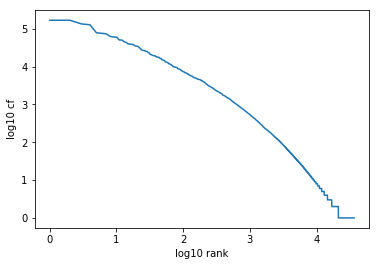

In [6]:
# your code here
import math
import matplotlib.pyplot as plt
x = []
y = []

fList = []
ind = 1
for key, val in wordList:
    fList.append(val)
    ind = ind + 1
    
for i in range(1, len(wordList)):
    x.append(math.log10(i))
    
for i in range(1, len(wordList)):
    y.append(math.log10(fList[i]))
    
plt.plot(x, y)
plt.xlabel('log10 rank')
plt.ylabel('log10 cf')
plt.show()
        

What do you observe? Is this consistent with Zipf's law?

The frequency decreases rapidly with rank, which is consistent with Zipf's law. It means that the frequency of any word is inversely proportional to its rank in the frequency table.

## Part 1.2: Feature Represenation (10 points)

In this part you will build feature vectors for each review. This will be input to our ML classifiers. You should call your parser from earlier, using all the same assumptions (e.g., casefolding, stemming). Each feature value should be the term count for that review.

In [7]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Build feature vectors
vectorizer = CountVectorizer(min_df=1)
featureVectors = vectorizer.fit_transform(tokenLists)
featureVectors = featureVectors.toarray();


## Part 1.3: Machine Learning Basics (30 points)

In this part you will evaluate a bunch of classifiers -- kNN, Decision tree, Naive Bayes, and SVM -- on the feature vectors generated in the previous task in two different settings. **You do not need to implement any classifier from scratch. You may use scikit-learn's built-in capabilities.**

### Setting 1: Splitting data into train-test 

In the first setting, you should treat the first 70% of your data as training. The remaining 30% should be for testing. 

### Setting 2: Using 5 fold cross-validation

In the second setting, use 5-folk cross-validation. 

### What to report

* Report the overall accuracy for both settings.
* For the class "Food-relevant", report the precision and recall for both settings.
* For the class "Food-irrelevant", report the precision and recall for both settings.

In [301]:
# your code here...plus add cells for reporting your results
# https://stackoverflow.com/questions/27357121/scikit-calculate-precision-and-recall-using-cross-val-score-function
# https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score,precision_score, recall_score, precision_recall_fscore_support as score
from sklearn import svm, preprocessing

labels = []
for item in allfile:
    labels.append(item["label"])

labels = np.asarray(labels)
def classifierPerformSet1 (classifer, testPercentage, featureVectors, labels):
    featureVectors_train, featureVectors_test, label_train, label_test = train_test_split(featureVectors, labels, test_size=testPercentage)
    classifer.fit(featureVectors_train, label_train)
    predicted=classifer.predict(featureVectors_test)
    accuracy = accuracy_score(label_test, predicted)
    precision, recall, fscore, support = score(label_test, predicted, labels=['Food-relevant','Food-irrelevant'])
    
    return accuracy,precision[0], precision[1], recall[0], recall[1]
        
def classifierPerformSet2 (classifer, foldNumber, featureVectors, labels):
    
    totalAccuracy = 0
    totalPrecisionIf = 0
    totalPrecisionRf = 0
    totalRecallIF = 0
    totalRecallRF = 0
    
    kf = KFold(n_splits=foldNumber)

    for train_index, test_index in kf.split(featureVectors):
        
        featureVectors_train = featureVectors[train_index]
        featureVectors_test = featureVectors[test_index]
        label_train = labels[train_index]
        label_test = labels[test_index]
        
        
        classifer.fit(featureVectors_train, label_train)
        predicted=classifer.predict(featureVectors_test)
        precision, recall, fscore, support = score(label_test, predicted, labels=['Food-relevant','Food-irrelevant'])
        
        totalAccuracy += accuracy_score(label_test, predicted)
        totalPrecisionRf += precision[0]
        totalPrecisionIf += precision[1]
        totalRecallRF += recall[0]
        totalRecallIF += recall[1]
    
#     scores = cross_val_score(classifer, featureVectors, labels, cv=foldNumber, scoring='accuracy')
#     precision, recall, fscore, support = score(label_test, predicted, labels=['Food-relevant','Food-irrelevant'])
    return totalAccuracy/(foldNumber),totalPrecisionRf/(foldNumber),totalPrecisionIf/(foldNumber), totalRecallRF/(foldNumber), totalRecallIF/(foldNumber)

def calculInformationForclassifierSet1 (classifierList):
    
    length = len(classifierList)
    totalAccuracy = 0
    totalFoodRelevantPrecision = 0
    totalFoodIrrelevantPrecision = 0
    totalFoodRelevantRecall = 0
    totalFoodIrrelevantRecall=0
    accuracylist = []
    for classifier in classifierList:
        accuracy, frPrecision, ifrPrecision, frRecall, ifrRecall = classifierPerformSet1(classifier, 0.3, featureVectors, labels)
#         accuracySet2, precisionSet2, recallSet2 = calculateAccuracySet2(classifier, 5, featureVectors, label)
        accuracylist.append(accuracy)
        totalAccuracy += accuracy
        totalFoodRelevantPrecision += frPrecision
        totalFoodIrrelevantPrecision += ifrPrecision
        totalFoodRelevantRecall += frRecall
        totalFoodIrrelevantRecall += ifrRecall
    
    return totalAccuracy/length, totalFoodRelevantPrecision/length, totalFoodIrrelevantPrecision/length, totalFoodRelevantRecall/length, totalFoodIrrelevantRecall/length, accuracylist

def calculInformationForclassifierSet2 (classifierList):
    length = len(classifierList)
    accuracylist = []
    totalAccuracy = 0
    totalFoodRelevantPrecision = 0
    totalFoodIrrelevantPrecision = 0
    totalFoodRelevantRecall = 0
    totalFoodIrrelevantRecall=0
    
    
    for classifier in classifierList:
        accuracy, frPrecision, ifrPrecision, frRecall, ifrRecall = classifierPerformSet2(classifier, 5, featureVectors, labels)
        accuracylist.append(accuracy)
        totalAccuracy += accuracy
        totalFoodRelevantPrecision += frPrecision
        totalFoodIrrelevantPrecision += ifrPrecision
        totalFoodRelevantRecall += frRecall
        totalFoodIrrelevantRecall += ifrRecall
    
    return totalAccuracy/length, totalFoodRelevantPrecision/length, totalFoodIrrelevantPrecision/length, totalFoodRelevantRecall/length, totalFoodIrrelevantRecall/length, accuracylist



decisionTreeClassifier = DecisionTreeClassifier(random_state=0)
naiveBayesCls = GaussianNB()
knn = KNeighborsClassifier()
clfSVR = svm.SVC()

# print classifierPerformSet1(decisionTreeClassifier, 0.3, featureVectors, label)
# print classifierPerformSet2(decisionTreeClassifier, 5, featureVectors, label)
# # print labels
# lb = preprocessing.LabelBinarizer()
# print lb.fit_transform(labels)
# labels = np.array([number[0] for number in lb.fit_transform(labels)])
# print labels
# scores = cross_validation.cross_val_score(knn, featureVectors, labels, cv=5, scoring='recall')
# print scores.mean()

classifierList = [decisionTreeClassifier, naiveBayesCls, knn, clfSVR]
resultSet1 = calculInformationForclassifierSet1(classifierList)
print 'Set1:'
print 'overall accuracy:', resultSet1[0]
print 'food-relevant precision:', resultSet1[1]
print 'food-irrelevant precision:',resultSet1[2]
print 'food-relevant recall:',resultSet1[3]
print 'food-irrelevant recall:',resultSet1[4]
print 'accuracy for decisionTreeClassifier, naiveBayesCls, knn, SVM:', resultSet1[5]

resultSet2 = calculInformationForclassifierSet2(classifierList)
print 'Set2:'
print 'overall accuracy:', resultSet2[0]
print 'food-relevant precision:', resultSet2[1]
print 'food-irrelevant precision:', resultSet2[2]
print 'food-relevant recall:', resultSet2[3]
print 'food-irrelevant recall:', resultSet2[4]
print 'accuracy for decisionTreeClassifier, naiveBayesCls, knn, SVM:',resultSet2[5]



Set1:
overall accuracy: 0.752380952381
food-relevant precision: 0.791537050014
food-irrelevant precision: 0.768714142071
food-relevant recall: 0.902480144225
food-irrelevant recall: 0.423737541985
accuracy for decisionTreeClassifier, naiveBayesCls, knn, clfSVR: [0.77380952380952384, 0.794047619047619, 0.74285714285714288, 0.69880952380952377]
Set2:
overall accuracy: 0.726160714286
food-relevant precision: 0.774177552739
food-irrelevant precision: 0.722358636214
food-relevant recall: 0.879724226769
food-irrelevant recall: 0.388940599605
accuracy for decisionTreeClassifier, naiveBayesCls, knn, clfSVR: [0.76357142857142857, 0.71285714285714286, 0.72464285714285714, 0.70357142857142863]


## Part 1.4: Analyzing your results (5 points) 



For those 4 classifiers, SVM with default parameters has the worst accuracy, and the decision tree and naive bayes have better accuracy. But the classifiers I choose in this problem are all created with default parameters. However, if parameters are changed, the accuracy will be totally different. For example, if C = 100 and gamma = 0.0001 for SVM, the accuracy will be improved. Also, we can altered the numbers of neighbors of KNN approach to achieve a better result. 

Then we compare these 2 settings, the overall accuracy of setting 1 is better than setting 2 and also the perspective accuracy of KNN, decision tree, naive bayes and SVM. As for the precision and recall, setting 1 achieves higher precision and recall for both food-relevant and food-irrelevant classes, which mean train-test data returns substantially more relevant results than irrelevant ones(precision) and returns most of the relevant results(recall) comparing with 5-cross-validation setting.

## Part 1.5: Improving your classifier (10 points)

I think we can do better! In this part, your job is to create new features that you can think can help improve your classifier. You may choose to use new weightings for your words, new derived features (e.g., count of 3-letter words), or whatever you like. You may also add in the extra features in the json: funny, useful, cool. You will need to experiment with different approaches ... once you finalize on your best approach, include the features here with a description (that is, tell us what the feature means). Then give us your classifier results!

In [ ]:
# your code here ... add as many cells as you need for features, results, and discussion.
# I tried to change the K in KNN, C and gamma in SVM, below are some tests code, and I will put the code of best result
# in the next code cell.
# clf = svm.SVC(gamma = 0.0001, C=100)
# origin = [clf]
# print 'SVM accuracy:', calculInformationForclassifierSet1(origin)[5]
# print 'SVM accuracy:', calculInformationForclassifierSet1(origin)[5]
# clf1 = svm.SVC(gamma = 0.0001, C=100)
# test = [dt1, nb1, k1, clf1]
# print 'SVM accuracy:', calculInformationForclassifierSet1(test)[5]
# print 'SVM accuracy:', calculInformationForclassifierSet1(test)[5]

# k = KNeighborsClassifier()
# origin = [k]
# print 'SVM accuracy:', calculInformationForclassifierSet1(origin)[5]
# print 'SVM accuracy:', calculInformationForclassifierSet1(origin)[5]
# k1 = KNeighborsClassifier(n_neighbors = 10)
# test = [k1]
# print 'SVM accuracy:', calculInformationForclassifierSet2(test)[5]
# print 'SVM accuracy:', calculInformationForclassifierSet2(test)[5]



Disscuss:
In this section, I tried to change some parameters of the classifiers, such as the K in KNN, and also gamma and C in SVM approach. No matter how I changed K, the accuracy of KNN does not change too much. For gamma and C in SVM, these 2 parameters could somewhat affect the result. 

Also, I tried to change the way of creating feature vectors. In the previous section, we use countVectorizer method and each feature value should be the term count for that review. However, we did not consider the effect of stop words and thus effect our final results. Stop words were always the top words, but these words will give us useless information and distract us from the right result. On the contrary, words like 'breakfast', 'lunch', 'dinner', 'eat', 'delicious', 'tasty' and so on should be weighted more. I used TFIDFVectorizer to improve the performance. This can reflect how important a word is to a document in a collection and can be used as a weighting factor and also used for stop-words filtering in various subject fields. The result show that the total accuracy have improved and KNN accuracy improved significantly.

In [302]:
from sklearn.feature_extraction.text import TfidfVectorizer
transformer = TfidfVectorizer()
tfidf = transformer.fit_transform(tokenLists)
altered_featureVectors = tfidf.toarray()
def calculInformationForclassifierSet1 (classifierList):
    
    length = len(classifierList)
    totalAccuracy = 0
    totalFoodRelevantPrecision = 0
    totalFoodIrrelevantPrecision = 0
    totalFoodRelevantRecall = 0
    totalFoodIrrelevantRecall=0
    accuracylist = []
    for classifier in classifierList:
        accuracy, frPrecision, ifrPrecision, frRecall, ifrRecall = classifierPerformSet1(classifier, 0.3, altered_featureVectors, labels)
#         accuracySet2, precisionSet2, recallSet2 = calculateAccuracySet2(classifier, 5, featureVectors, label)
        accuracylist.append(accuracy)
        totalAccuracy += accuracy
        totalFoodRelevantPrecision += frPrecision
        totalFoodIrrelevantPrecision += ifrPrecision
        totalFoodRelevantRecall += frRecall
        totalFoodIrrelevantRecall += ifrRecall
    
    return totalAccuracy/length, totalFoodRelevantPrecision/length, totalFoodIrrelevantPrecision/length, totalFoodRelevantRecall/length, totalFoodIrrelevantRecall/length, accuracylist

def calculInformationForclassifierSet2 (classifierList):
    length = len(classifierList)
    accuracylist = []
    totalAccuracy = 0
    totalFoodRelevantPrecision = 0
    totalFoodIrrelevantPrecision = 0
    totalFoodRelevantRecall = 0
    totalFoodIrrelevantRecall=0
    
    
    for classifier in classifierList:
        accuracy, frPrecision, ifrPrecision, frRecall, ifrRecall = classifierPerformSet2(classifier, 5, altered_featureVectors, labels)
        accuracylist.append(accuracy)
        totalAccuracy += accuracy
        totalFoodRelevantPrecision += frPrecision
        totalFoodIrrelevantPrecision += ifrPrecision
        totalFoodRelevantRecall += frRecall
        totalFoodIrrelevantRecall += ifrRecall
    
    return totalAccuracy/length, totalFoodRelevantPrecision/length, totalFoodIrrelevantPrecision/length, totalFoodRelevantRecall/length, totalFoodIrrelevantRecall/length, accuracylist



df = DecisionTreeClassifier(random_state=0)
nb = GaussianNB()
k = KNeighborsClassifier()
clf = svm.SVC(C = 100, gamma = 0.0001)
classifierList = [dt, nb, k, clf]
improvedResult = calculInformationForclassifierSet1(classifierList)
print 'Set1:'
print 'overall accuracy:', improvedResult[0]
print 'food-relevant precision:', improvedResult[1]
print 'food-irrelevant precision:',improvedResult[2]
print 'food-relevant recall:',improvedResult[3]
print 'food-irrelevant recall:',improvedResult[4]
print 'accuracy for decisionTreeClassifier, naiveBayesCls, knn, SVM:', improvedResult[5]

improvedResult2 = calculInformationForclassifierSet2(classifierList) 
print 'Set2:'
print 'overall accuracy:', improvedResult2[0]
print 'food-relevant precision:', improvedResult2[1]
print 'food-irrelevant precision:', improvedResult2[2]
print 'food-relevant recall:', improvedResult2[3]
print 'food-irrelevant recall:', improvedResult2[4]
print 'accuracy for decisionTreeClassifier, naiveBayesCls, knn, SVM:', improvedResult2[5]



Set1:
overall accuracy: 0.791071428571
food-relevant precision: 0.826057825808
food-irrelevant precision: 0.55210868631
food-relevant recall: 0.902666183866
food-irrelevant recall: 0.535933999235
accuracy for decisionTreeClassifier, naiveBayesCls, knn, clfSVR: [0.79523809523809519, 0.77500000000000002, 0.89523809523809528, 0.69880952380952377]
Set2:
overall accuracy: 0.758660714286
food-relevant precision: 0.800320282047
food-irrelevant precision: 0.509646138763
food-relevant recall: 0.885994662725
food-irrelevant recall: 0.479779040404
accuracy for decisionTreeClassifier, naiveBayesCls, knn, clfSVR: [0.77250000000000008, 0.72357142857142853, 0.84892857142857159, 0.68964285714285711]


### BONUS: What are the most informative features in distinguishing these two classes?

The re-weight term count is the most informative features in distinguishing these two classes. We could extract the more interesting and valueable terms instead of very frequent words, such as the stop words.

# Part 2: Learning to Rank (30 points)

For this part, we're going to play with some Microsoft LETOR data that has query-document relevance judgments. Let's see how learning to rank works in practice. 

First, you will need to download the MQ2008.zip file from the Resources tab on Piazza. This is data from the [Microsoft Research IR Group](https://www.microsoft.com/en-us/research/project/letor-learning-rank-information-retrieval/).

The data includes 15,211 rows. Each row is a query-document pair. The first column is a relevance label of this pair (0,1 or 2--> the higher value the more related), the second column is query id, the following columns are features, and the end of the row is comment about the pair, including id of the document. A query-document pair is represented by a 46-dimensional feature vector. Features are a numeric value describing a document and query such as TFIDF, BM25, Page Rank, .... You can find compelete description of features from [here](https://arxiv.org/ftp/arxiv/papers/1306/1306.2597.pdf).

The good news for you is the dataset is ready for analysis: It has already been split into 5 folds (see the five folders called Fold1, ..., Fold5).

For this assignment, we're going to leave our favorite scikit-learn and instead use [SVM-rank](https://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html). This is the basic ranking SVM we talked about in class. You'll see that SVM-rank considers pairwise relevance between docs -- so based on the training data it will transform the data into pairs -- like D1 > D2 and then learn a separator.


## Part 2.1: Optimizing SVM-Rank (15 points)

First, you should explore how the different parameters affect the quality of the Ranking SVM. You'll see that you can vary the kernel function, the loss function and so forth. 

You should run SVM-Rank using the default options over each of the five folds. You should find the error on the test set (for example, depending on your settings, svm_rank_classify will give you the zero/one error statistics (that is, the number of correct pairs and the number of incorrect pairs). Report the average. 

Then try different parameters and report how they impact the quality of results. 

For the default setting (trade-off between training error and margin = default 0.01)
For Folder1: 58.33%
For Folder2: 56.05%
For Folder3: 62.42%
For Folder4: 70.06%
For Folder5: 64.33%
the average of the zero/one-error on test set is (58.33% + 56.05% + 62.42% + 70.06% + 64.33%) / 5 = 62.238%

When trying to change the trade-off between training error and margin = 1, the zero/one-error average decreased:
Average = (58.33% + 55.41% + 61.78% + 66.88% + 64.97%) / 5 = 61.47%

When trying to change the loss functions = 2(which means the fraction of swapped pairs averaged over all queries), the average of zero/one-error on test sets decreased a bit:
Average = (57.05% + 54.14% + 61.78% + 73.25% + 64.33% ) / 5 = 62.11%

When trying to change the Optimization Options with 1-slack algorithm (dual) with constraint cache,
average of zero/one-error on test sets decreased a bit:
Average = (58.97% + 56.05% + 62.42% + 68.79% + 64.33%) / 5 = 62.112%



## Part 2.1: Noise! (15 points)

Now we're going to investigate whether the ranking SVM is easily influenced by noisy features. For example, what if some of the features you have are in error? Or what if you downloaded only a portion of a page to calculate a feature? (so the count of inlinks would be wrong)? 

In this case, add some noise to the features. What happens to the results? You may choose to add random noise throughout, noise to a single feature, noise to multiple features, etc. The choices are up to you. We aim to see what kind of exploration you conduct and what you conclude.

*add your results and discussion here*

Discuss:
For each folder in MQ2008, I randomly chose qids and added random noise to their features. At first, I only chose 50 items and add noise to all features, but the zero/one-error did not change, so I keep adding the noise to the features. The result below is randomly 500 items with noise on all features:

As we can see from the zero/one-error on the 5 folders, the average = (57.69% + 56.05% + 62.42% + 70.70% + 63.69%) / 5 = 62.11%, which decreased by 0.12% from the noise-free one. Also, the total number of swapped pairs and the average loss varied in each noise-added test-train pairs, but not in a significant way.

I assume it is because SVM is robust in high dimensional spaces. Also, SVM has good generalization ability, so that only a small fraction of noise will not affect the accuracy. But the accuracy will definetely decrease if the noise is really noticeable.

## Collaboration declarations

*If you collaborated with anyone (see Collaboration policy at the top of this homework), you can put your collaboration declarations here.*

Declarations:
https://stackoverflow.com/questions/15547409/how-to-get-rid-of-punctuation-using-nltk-tokenizer: use to tokenize words with Regex
http://www.nltk.org/book_1ed/ch03.html to stem the words
https://stackoverflow.com/questions/27357121/scikit-calculate-precision-and-recall-using-cross-val-score-function to calculate precision and recall 
https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/ some guides towards classifiers